# Amazon Customer Data Analysis

The Data set is about Customers review information of who ordered products from Amazon. This database is in Database format (SQLite).

Below are the attributes of the dataset.

- Id
- ProductID
- UserId
- ProductName
- HelpfulnessNumerator
- HelpfulnessDenomerator
- Score
- Time
- Summary
- Text

Perform The EDA Analysis as per below statements.
-  Perform Sentimental Analysis
- Which Users types get recommendations of which products by Amazon?
- Analyse Score Ratings

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Import dataset from SQLite database


In [2]:
con=sqlite3.connect('C:/Users/Rohit/Desktop/Amazon Customer Data Analysis/database.sqlite')

In [3]:
type(con)

sqlite3.Connection

In [4]:
df=pd.read_sql_query('select * from Reviews',con)

In [5]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [6]:
df.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.shape

(568454, 10)

In [9]:
pd.read_sql_query('select * from Reviews limit 5',con)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

# 1) Perform Sentimental Analysis

In [10]:
! pip install textblob

In [11]:
from textblob import TextBlob

In [12]:
text= df['Summary'][0]
text

'Good Quality Dog Food'

In [13]:
TextBlob(text).sentiment.polarity

0.7

 The above polarity = 0.7 shows positive sentiment of 1st Field in Summary column.

Now we can find the sentiment polarity of the entire dataset

In [14]:
polarity=[]

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:  # For any missing or null Value
        polarity.append(0)
    

In [15]:
len(polarity)

568454

In [16]:
data= df.copy()

In [17]:
data['Polarity']=polarity

In [18]:
data.head(10)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8   9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9  10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   
8                     1                       1      5  1322006400   
9                     0                       0      5  1351209600   

                                         Summary  \
0                          Good Quality Dog Food   
1                              Not as Advertised   
2                          "Delight" says it all   
3                                 Cough Medicine   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   
8                                     Yay Barley   
9                               Healthy Dog Food   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...  0.700000  
1  Product arrived labeled as Jumbo Salted Peanut...  0.000000  
2  This is a confection that has been around a fe...  0.000000  
3  If you are looking for the secret ingredient i...  0.000000  
4  Great taffy at a great price.  There was a wid...  0.800000  
5  I got a wild hair for taffy and ordered this f...  0.600000  
6  This saltwater taffy had great flavors and was...  0.358333  
7  This taffy is so good.  It is very soft and ch...  1.000000  
8  Right now I'm mostly just sprouting this so my...  0.000000  
9  This is a very healthy dog food. Good for thei...  0.500000

In [19]:
data['Polarity'] = data['Polarity'].round(2)

In [20]:
data.head(10)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8   9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9  10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   
8                     1                       1      5  1322006400   
9                     0                       0      5  1351209600   

                                         Summary  \
0                          Good Quality Dog Food   
1                              Not as Advertised   
2                          "Delight" says it all   
3                                 Cough Medicine   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   
8                                     Yay Barley   
9                               Healthy Dog Food   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...      0.70  
1  Product arrived labeled as Jumbo Salted Peanut...      0.00  
2  This is a confection that has been around a fe...      0.00  
3  If you are looking for the secret ingredient i...      0.00  
4  Great taffy at a great price.  There was a wid...      0.80  
5  I got a wild hair for taffy and ordered this f...      0.60  
6  This saltwater taffy had great flavors and was...      0.36  
7  This taffy is so good.  It is very soft and ch...      1.00  
8  Right now I'm mostly just sprouting this so my...      0.00  
9  This is a very healthy dog food. Good for thei...      0.50

# 1.1) Perform EDA on Positive Sentiments

In [21]:
data_positive= data[data['Polarity']>0.0]

In [22]:
data_positive.shape

(331005, 11)

In [23]:
data_positive.head()

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   

                                         Summary  \
0                          Good Quality Dog Food   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...      0.70  
4  Great taffy at a great price.  There was a wid...      0.80  
5  I got a wild hair for taffy and ordered this f...      0.60  
6  This saltwater taffy had great flavors and was...      0.36  
7  This taffy is so good.  It is very soft and ch...      1.00

In [24]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud, STOPWORDS

In [26]:
stopwords= set(STOPWORDS)

In [27]:
# Join all the words of Summary Column.
total_words= (' '.join(data_positive['Summary']))

In [28]:
len(total_words)

8444678

In [29]:
total_words[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [30]:
# import Regular expression model

import re
total_words= re.sub('[^a-zA-Z]', ' ', total_words) # It removes all and only Alphabets/words in both small & capital remain.

In [31]:
total_words[0:20000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [32]:
# In above output , there are multiple extra Spaces which has to be removed.
#total_words= re.sub(' +',total_words)

(-0.5, 999.5, 499.5, -0.5)

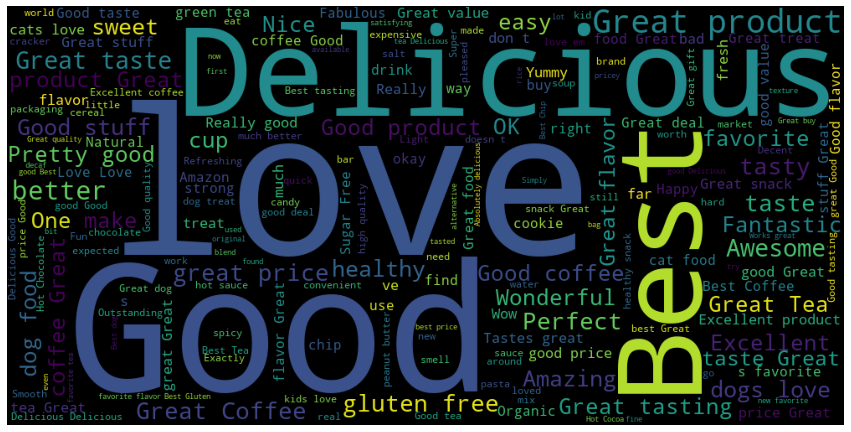

In [33]:
wordcloud= WordCloud(width=1000, height=500,stopwords=stopwords).generate(total_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

# 1.2) Perform EDA on Negetive Sentiments

In [34]:
data_negetive= data[data['Polarity']<0.0]

In [35]:
data_negetive.shape

(52437, 11)

In [36]:
data_negetive.head()

Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
16  17  B001GVISJM  A3KLWF6WQ5BNYO  Erica Neathery                     0   
26  27  B001GVISJM  A3RXAU2N8KV45G          lady21                     0   
57  58  B004N5KULM   ASCNNAJU6SXF8         S. Beck                     1   
61  62  B004N5KULM   A7ZK2A3VIW7X9           Peggy                     0   
62  63  B001EO5TPM  A1E09XGZUR78C6   gary sturrock                     2   

    HelpfulnessDenominator  Score        Time                Summary  \
16                       0      2  1348099200             poor taste   
26                       1      1  1332633600        Nasty No flavor   
57                       1      5  1336176000  How can you go wrong!   
61                       2      5  1319414400       pretty expensive   
62                       2      1  1215302400         stale product.   

                                                 Text  Polarity  
16  I love eating them and they are good for watch...     -0.40  
26  The candy is just red , No flavor . Just  plan...     -1.00  
57  It is chocolate, what can I say.  Great variet...     -0.62  
61  This bag of candy online is pretty expensive, ...     -0.12  
62  Arrived in 6 days and were so stale i could no...     -0.50

In [37]:
# Join all the words of Summary Column.
total_words2= (' '.join(data_negetive['Summary']))

In [38]:
len(total_words2)

1435604

In [39]:
total_words2[0:10000]

'poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley\'s Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don\'t Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad b

In [40]:
import re
total_words2= re.sub('[^a-zA-Z]', ' ', total_words2)

In [41]:
total_words2

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

(-0.5, 999.5, 499.5, -0.5)

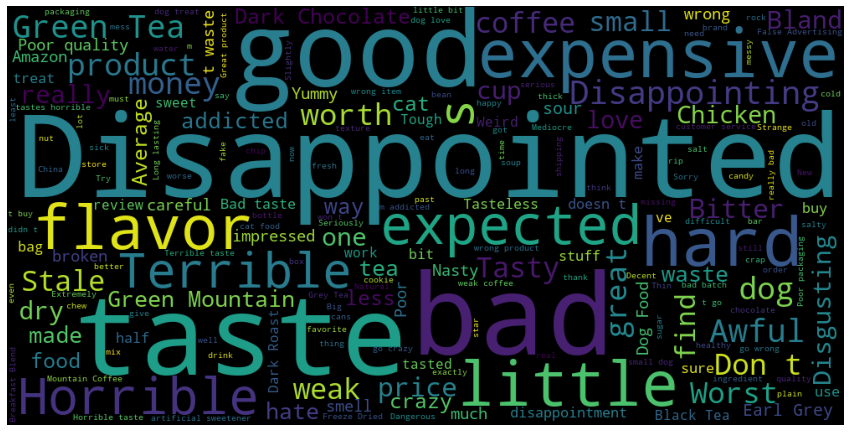

In [42]:
wordcloud2= WordCloud(width=1000, height=500,stopwords=stopwords).generate(total_words2)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud2)
plt.axis('off')

# 2) Which Users types get recommendations of which products by Amazon?

In [43]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [45]:
# Count Unique Users Id
df['UserId'].nunique()

256059

In [51]:
# Aggregate the count of summary, # of Feedbacks from Text Column, mean score from Score Column and  of product ordered by each
# User from ProductId Column of each UserID in decending order by Text. 
raw= df.groupby('UserId').agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by='Text', ascending=False)

In [52]:
raw

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [54]:
raw.columns=('Number of Summaries', 'Numbers of Texts','Average Score','Number of Product purchased')
raw

Number of Summaries  Numbers of Texts  Average Score  \
UserId                                                                 
A3OXHLG6DIBRW8                  448               448       4.535714   
A1YUL9PCJR3JTY                  421               421       4.494062   
AY12DBB0U420B                   389               389       4.647815   
A281NPSIMI1C2R                  365               365       4.841096   
A1Z54EM24Y40LL                  256               256       4.453125   
...                             ...               ...            ...   
A2HROKQO0GA5AF                    1                 1       3.000000   
A2HROR28DMJV2W                    1                 1       5.000000   
A2HRR8CO2Y20G8                    1                 1       5.000000   
A2HRSML93IK9TR                    1                 1       5.000000   
AZZZOVIBXHGDR                     1                 1       2.000000   

                Number of Product purchased  
UserId                                       
A3OXHLG6DIBRW8                          448  
A1YUL9PCJR3JTY                          421  
AY12DBB0U420B                           389  
A281NPSIMI1C2R                          365  
A1Z54EM24Y40LL                          256  
...                                     ...  
A2HROKQO0GA5AF                            1  
A2HROR28DMJV2W                            1  
A2HRR8CO2Y20G8                            1  
A2HRSML93IK9TR                            1  
AZZZOVIBXHGDR                             1  

[256059 rows x 4 columns]

Text(0.5, 1.0, 'Top 10 Users by Number of Product purchased')

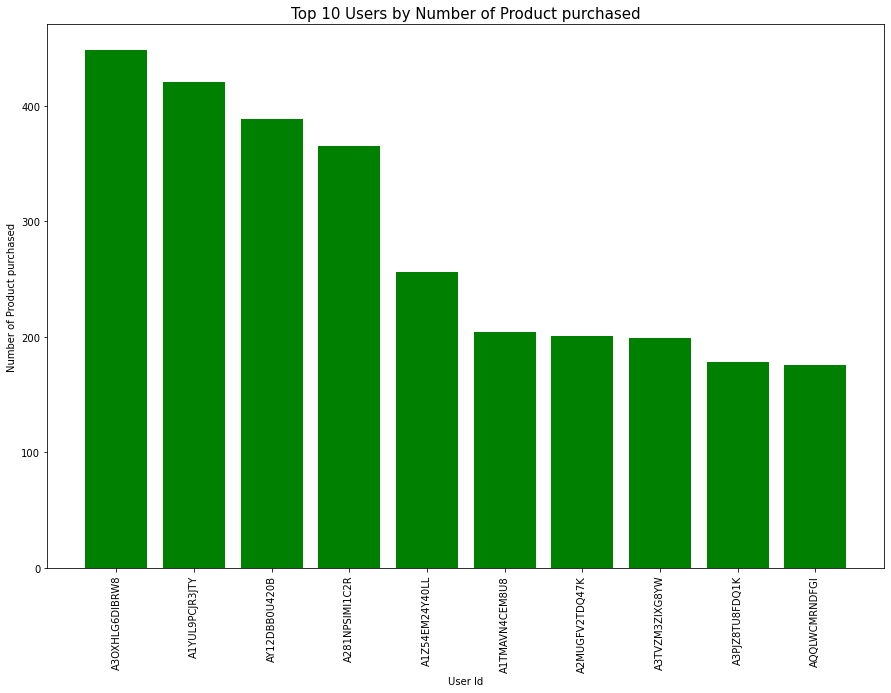

In [66]:
# Plotting Bar chart for top 10 USers by Number of Product purchased
user_10= raw.index[0:10]
purchased_10= raw['Number of Product purchased'][0:10]
plt.figure(figsize=(15,10))
plt.bar(user_10,purchased_10, color='g')
plt.xlabel('User Id')
plt.ylabel('Number of Product purchased')
plt.xticks(rotation='vertical')
plt.title('Top 10 Users by Number of Product purchased', fontsize='15')

# 3) Analyse Customers Feedback Lengths

In [68]:
# Due to heavy chunk of dataset we consider first 2000 row for our analysis.
final=df[0:2000]

In [69]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [72]:
# Check for any null values
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

There is not any null field in out dataset.

In [74]:
# Check for any duplicacy of data
final.duplicated().sum()

0

There is no duplicacy of data in our dataset.

In [82]:
# Splitting the text of Text column first index in separate words
final['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [85]:
# Calculate the length of separate words
len(final['Text'][0].split(' '))

49

In [94]:
# Calculate the length of separate words for Text column of final dataset

def calc_len(Text):
    return len(Text.split(' '))

In [91]:
final['Text_len']=final['Text'].apply(calc_len)

<ipython-input-91-7a830a26ee70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_len']=final['Text'].apply(calc_len)


In [92]:
import plotly.express as px

In [93]:
px.box(final, y='Text_len' )

- The average word length is 53 
- Q1 and Q3 are 33 word length and 90 word length respectively
- Outlier is having 176 till 936 word length because upper limit of box plaot is 175 word length 

# 4) Analyse Score Ratings

C:\Users\Rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

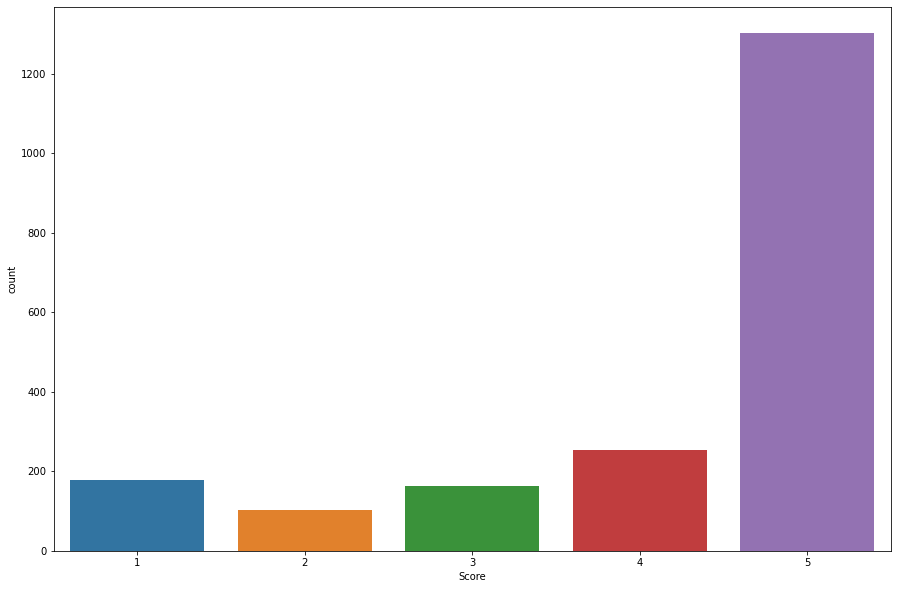

In [103]:
plt.figure(figsize=(15,10))
sns.countplot(final['Score'])

- The 5 Star score is the highest counts and above 1300 counts.
- The 2 Star score is the lowest counts and little more than 100 counts.
- There is huge difference in counts between 5 star and rest of all stars.